In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dữ liệu từ file CSV
data = pd.read_csv("mnist_train.csv")

test_dt = pd.read_csv("mnist_test.csv")

# Tách features (X) và nhãn (y)
X_train = data.drop('label', axis=1)
y_train = data['label']

X_test = test_dt.drop('label', axis=1)
y_test = test_dt['label']

# # Chia tập dữ liệu thành tập huấn luyện và tập kiểm thử
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred = knn_model.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tìm các mẫu dự đoán sai
misclassified_samples = X_test[y_test != y_pred]

# In số lượng mẫu dự đoán sai và hiển thị một số mẫu
print(f'Number of misclassified samples: {len(misclassified_samples)}')


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
from sklearn.model_selection import train_test_split

In [163]:
train_dt = pd.read_csv("mnist_train.csv")

In [164]:
test_dt = pd.read_csv("mnist_test.csv")

In [165]:
X_train = train_dt.iloc[:, 1:].values
y_train = train_dt.iloc[:, 0].values

X_test = test_dt.iloc[:, 1:].values
y_test = test_dt.iloc[:, 0].values

In [149]:
# Kiểm tra kích thước của DataFrame
num_records, num_features = train_dt.shape

print(f"Số lượng dữ liệu (bản ghi): {num_records}")
print(f"Số lượng đặc trưng: {num_features - 1}")  # Trừ 1 để loại bỏ cột nhãn 'label'

Số lượng dữ liệu (bản ghi): 60000
Số lượng đặc trưng: 784


In [104]:
# Giả sử y_train là mảng chứa nhãn của dữ liệu
y_train_unique_values = np.unique(y_train)

# Đếm số lượng unique values
num_classes = len(y_train_unique_values)

print(f"Số lượng unique values trong y_train: {num_classes}")

Số lượng unique values trong y_train: 10


In [182]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)


In [ ]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation="nearest")
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

In [163]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [164]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [165]:
from sklearn.preprocessing import StandardScaler


X_train = StandardScaler().fit_transform(X_train)

X_test = StandardScaler().fit_transform(X_test)

In [166]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [166]:
from sklearn.decomposition import PCA

In [153]:
import numpy as np
 
def PCA_defined(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [198]:
mat_reduced = PCA_defined(X_train, 2)
principal_df = pd.DataFrame(mat_reduced)
principal_df['label'] = train_dt['label']
# principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

In [197]:
principal_df

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,label
0,-123.932589,-312.674262,-24.514052,-555.757958,27.296668,232.476284,233.995733,159.799494,363.515021,-198.428077,...,53.230860,31.833660,0.726879,-16.508330,-25.815422,-28.378215,55.018998,-20.083274,-39.589952,5
1,-1011.718376,-294.857038,596.339561,-460.766197,827.275222,181.950528,-45.020478,-104.969592,-40.459118,-150.968899,...,63.505051,-46.836698,34.531079,-25.926578,27.867842,28.420288,7.241299,-12.457809,12.743231,0
2,51.849608,392.173153,-188.509749,521.011347,306.680729,1.835346,-859.047199,368.591875,114.546074,178.508144,...,91.034657,-26.476838,13.189897,-102.929416,-6.051062,74.464076,-54.195822,48.479797,73.278263,4
3,799.127037,-607.197217,273.651240,105.878237,1.853226,-699.654696,-473.713204,-67.321708,-302.731266,-11.111365,...,34.612465,-6.437832,7.563749,-45.611006,-8.103525,13.624440,36.802572,-15.698541,36.525392,1
4,382.754942,730.542867,16.353747,-241.697519,-98.161346,-43.229727,-91.666599,-405.554885,-225.501854,-104.112265,...,10.394836,-6.297174,-43.159962,4.906619,25.015851,-28.875120,-56.621607,-32.981212,27.399438,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,99.621760,-293.475562,135.940210,-347.124204,-304.275921,-236.993993,-498.555370,-237.614980,494.897815,-320.334732,...,-2.555429,13.143865,27.376466,56.091234,-34.212074,-50.888605,73.903015,-14.304751,-30.872820,8
59996,-152.757810,-687.899701,-88.932413,-650.013832,-198.407548,-184.771874,-487.139684,505.333589,668.867244,-27.123424,...,-56.065433,-9.270627,28.016957,-20.506549,58.010718,113.634555,30.564946,-9.742611,-39.916250,3
59997,178.053450,160.078211,-257.613082,-714.650442,210.315152,462.462634,-464.535103,-184.822530,87.524346,-268.114988,...,34.284041,25.996496,-14.533352,-59.579673,-17.763061,-36.528902,55.544855,87.998836,5.789797,5
59998,-130.606072,-5.591936,513.858674,342.703565,521.165818,540.554227,-107.376421,140.728774,16.495785,93.841658,...,80.983491,47.825289,118.577888,59.528625,30.147097,-26.953287,23.308354,5.062378,65.265256,6


In [172]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [177]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [174]:
print(f"Total number of components used after PCA : {pca.n_components_}")

Total number of components used after PCA : 2


In [178]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

print(f"train_img shape : {train_img.shape}")
print(f"test_img shape : {test_img.shape}")

train_img shape : (60000, 2)
test_img shape : (10000, 2)


In [181]:
train_img.describe

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [169]:
model = MultinomialNB()

In [171]:
model = GaussianNB()

In [172]:
model.fit(X_train, y_train)

GaussianNB()

In [173]:
y_pred = model.predict(X_test)

In [117]:
accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

In [175]:
# Hiển thị kết quả
print("Accuracy:", accuracy)
# print("\nConfusion Matrix:\n", conf_matrix)
# print("\nClassification Report:\n", classification_rep)

Accuracy: 0.1075


In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
model = KNeighborsClassifier(n_neighbors=1)

In [112]:
model.fit(train_img, y_train)

KNeighborsClassifier(n_neighbors=1)

In [113]:
y_pred = model.predict(test_img)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9694


NAIVE BAYES

In [188]:
import os
import math
import time
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


class NaiveBayes:
    def __init__(self):
        self.train_datas, self.train_labels, self.test_datas, self.test_labels = (
            [],
            [],
            [],
            [],
        )
        self.prior, self.likelihoods, self.confusionMatrix = [], [], []
        self.start, self.end, self.time_use = 0, 0, 0
        self.features = 0
        self.train_records = 0
        self.test_records = 0
        self.num_classes = 0
        self.features = 0
        self.feature_values = 256

    def init(self, X_train, y_train, X_test, y_test):
        self.train_labels = y_train
        self.train_datas = X_train

        self.test_labels = y_test
        self.test_datas = X_test

        self.train_records, self.features = self.train_datas.shape
        self.test_records = len(self.test_datas)

        self.num_classes = len(np.unique(self.train_labels))

        self.confusionMatrix = [[0] * self.num_classes for _ in range(self.num_classes)]

    def run(self):
        self.start = time.time()
        self.train()
        self.predict_logarit()
        self.end = time.time()
        self.time_use = self.end - self.start
        print(self.time_use)

    def assess(self):
        self.CM()

    def train(self):
        # Priori Probability
        self.prior = [0] * self.num_classes

        for label in self.train_labels:
            self.prior[label] += 1

        for i in range(self.num_classes):
            self.prior[i] /= self.train_records
            # print(f"priori Probability of {i}: ", self.prior[i])

        # Posterior Probability
        self.likelihoods = [
            [[0] * self.feature_values for _ in range(self.features)]
            for _ in range(self.num_classes)
        ]
        class_counts = [0] * self.num_classes

        for i in range(self.train_records):
            label = self.train_labels[i]
            for j in range(self.features):
                index = int(self.train_datas[i][j])
                self.likelihoods[label][j][index] += 1
            class_counts[label] += 1

        for i in range(self.num_classes):
            for j in range(self.features):
                for k in range(self.feature_values):
                    if self.likelihoods[i][j][k] == 0:
                        self.likelihoods[i][j][k] = 1e-7
                    else:
                        self.likelihoods[i][j][k] /= class_counts[i]

    def predict_logarit(self):
        correct = 0
        sum_errors = 0

        for i in range(self.test_records):
            max_prob = -float("inf")
            max_class = -1

            for j in range(self.num_classes):
                prob = math.log(self.prior[j])
                for k in range(self.features):
                    index = int(self.test_datas[i][k])
                    prob += math.log(self.likelihoods[j][k][index])

                if prob > max_prob:
                    max_prob = prob
                    max_class = j

            self.confusionMatrix[self.test_labels[i]][max_class] += 1

            if max_class == self.test_labels[i]:
                correct += 1
            else:
                sum_errors += 1

        print()
        print("so ket qua sai:", sum_errors)
        print("so ket qua dung:", correct)
        accuracy = correct / (sum_errors + correct)
        print("Accuracy:", accuracy)

    def CM(self):
        print("Ground Truth = GT")
        print("Predicted Label = PL")
        self.printLine()
        print(f"total= {self.test_records:3d}|", end="")
        for i in range(self.num_classes):
            print(f" PL = {i:2d} |", end="")
        print()
        self.printLine()

        for i in range(self.num_classes):
            print(f" GT = {i:2d}    |", end="")
            for j in range(self.num_classes):
                print(f"   {self.confusionMatrix[i][j]:4d}  |", end="")
            print()
            self.printLine()

    def printLine(self):
        print("------------|", end="")
        for _ in range(self.num_classes):
            print("---------|", end="")
        print()

In [189]:
NB = NaiveBayes()

In [55]:
# X_train = train_dt.iloc[:,1:].values
# y_train = train_dt.iloc[:,0].values

# X_test = test_dt.iloc[:,1:].values
# y_test = test_dt.iloc[:,0].values
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [190]:
NB.init(X_train, y_train, X_test, y_test)

In [180]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [191]:
X_test.shape

(10000, 784)

In [187]:
print("train_records: ", NB.train_records)
print("test_records: ", NB.test_records)
print("num_classes: ", NB.num_classes)
print("features: ", NB.features)
print("feature_values: ", NB.feature_values)

train_records:  60000
test_records:  10000
num_classes:  10
features:  784
feature_values:  256


In [35]:
# self.features = 0
# self.train_records = 0
# self.test_records = 0
# self.num_classes = 0
# self.features = 0
# self.feature_values = 256

In [193]:
NB.run()


so ket qua sai: 1607
so ket qua dung: 8393
Accuracy: 0.8393
177.12074375152588


In [194]:
NB.CM()

Ground Truth = GT
Predicted Label = PL
------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
total= 10000| PL =  0 | PL =  1 | PL =  2 | PL =  3 | PL =  4 | PL =  5 | PL =  6 | PL =  7 | PL =  8 | PL =  9 |
------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 GT =  0    |    881  |      0  |      4  |      5  |      2  |     47  |     16  |      1  |     24  |      0  |
------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 GT =  1    |      0  |   1048  |     26  |      6  |      1  |     16  |      5  |      0  |     33  |      0  |
------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 GT =  2    |     16  |      4  |    866  |     42  |     15  |      5  |     26  |      7  |     50  |      1  |
------------|---------|---------|---------|------

KNN


In [122]:
import numpy as np
from scipy.stats import mode


class KNearestNeighbors:
    def __init__(self):
        self.train_datas, self.train_labels, self.test_datas, self.test_labels = (
            [],
            [],
            [],
            [],
        )
        self.start, self.end, self.time_use = 0, 0, 0
        self.features = 0
        self.train_records = 0
        self.test_records = 0
        self.num_classes = 0
        self.features = 0
        self.op_labels = []
        
        # self.feature_values = 256

    def init(self, X_train, y_train, X_test, y_test):
        self.train_labels = y_train
        self.train_datas = X_train

        self.test_labels = y_test
        self.test_datas = X_test

        self.train_records, self.features = self.train_datas.shape
        self.test_records = len(self.test_datas)

        self.num_classes = len(np.unique(self.train_labels))

        self.confusionMatrix = [[0] * self.num_classes for _ in range(self.num_classes)]

    def eucledianDistance(self, p1, p2):
        dist = np.sqrt(np.sum((p1 - p2)**2))
        return dist

    def predict(self, k, num_samples):
        self.test_records = num_samples
        for i in range(self.test_records):
            distances = np.array([(j, self.eucledianDistance(self.train_datas[j], self.test_datas[i]))
                                  for j in range(self.train_records)])
            
            sorted_indices = np.argsort(distances[:, 1])
            
            neighbors = sorted_indices[:k]

            predicted_label = mode(self.train_labels[neighbors]).mode
            # print("GT - PL: ", self.test_labels[i], predicted_label)
            self.op_labels.append(predicted_label)

        return self.op_labels
    
    def CM(self, k):
        labels = len(np.unique(self.train_labels))
        corrects = 0

        print(f"with k = {k}")
        for i in range(self.test_records):
            GT_label = [j for j, label in enumerate(np.unique(self.train_labels)) if self.test_labels[i] == label][0]
            PL_label = [j for j, label in enumerate(np.unique(self.train_labels)) if self.op_labels[i] == label][0]
            self.confusionMatrix[GT_label][PL_label] += 1

        self.printLine()
        print(f"tt = {self.test_records:5d}|", end="")
        for i in range(labels):
            print(f" PL = {np.unique(self.train_labels)[i]:3d}|", end="")
        print("\n")
        self.printLine()

        for i in range(labels):
            print(f" GT = {np.unique(self.train_labels)[i]:3d} |", end="")
            for j in range(labels):
                print(f"    {self.confusionMatrix[i][j]:3d}  |", end="")
            print("\n")
            self.printLine()

        corrects = np.sum(np.diag(self.confusionMatrix))
        accuracy = corrects / self.test_records
        print(f"accuracy = {accuracy:.2f}\n\n")


    def printLine(self):
        print("----------|", end="")
        for _ in range(len(np.unique(self.train_labels))):
            print("---------|", end="")
        print("\n")

# distances = list()
            
#             for j in range(self.train_records):
#                 dist = self.eucledianDistance(self.train_datas[j], self.test_datas[i])
                
#                 # Thêm cả chỉ mục j và distances vào point_dist
#                 distances.append((j, dist))
            
#             distances = np.array(distances)

In [63]:
train_dt = pd.read_csv("mnist_train.csv")

test_dt = pd.read_csv("mnist_test.csv")

X_train = train_dt.iloc[:, 1:].values
y_train = train_dt.iloc[:, 0].values

X_test = test_dt.iloc[:, 1:].values
y_test = test_dt.iloc[:, 0].values

In [123]:
newKNN = KNearestNeighbors()

In [124]:
newKNN.init(train_img, y_train, test_img, y_test)

In [125]:
# k - num_samples
arr = newKNN.predict(1, 10000)

In [140]:
# arr
misclassified_samples = newKNN.test_datas[newKNN.test_labels != newKNN.op_labels]
misclassified_data = pd.DataFrame({
    'Actual': y_test[y_test != y_pred],
    'Predicted': y_pred[y_test != y_pred],
    'Index': y_test[y_test != y_pred].index
})
# In số lượng mẫu dự đoán sai và hiển thị một số mẫu
print(f'Number of misclassified samples: {len(misclassified_samples)}')
print('Misclassified samples:')
print(misclassified_data)


Number of misclassified samples: 306
Misclassified samples:
      Actual  Predicted  Index
115        4          9    115
195        3          5    195
241        9          8    241
268        8          5    268
300        4          1    300
...      ...        ...    ...
9879       0          6   9879
9883       5          1   9883
9904       2          0   9904
9905       3          9   9905
9982       5          3   9982

[309 rows x 3 columns]


c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

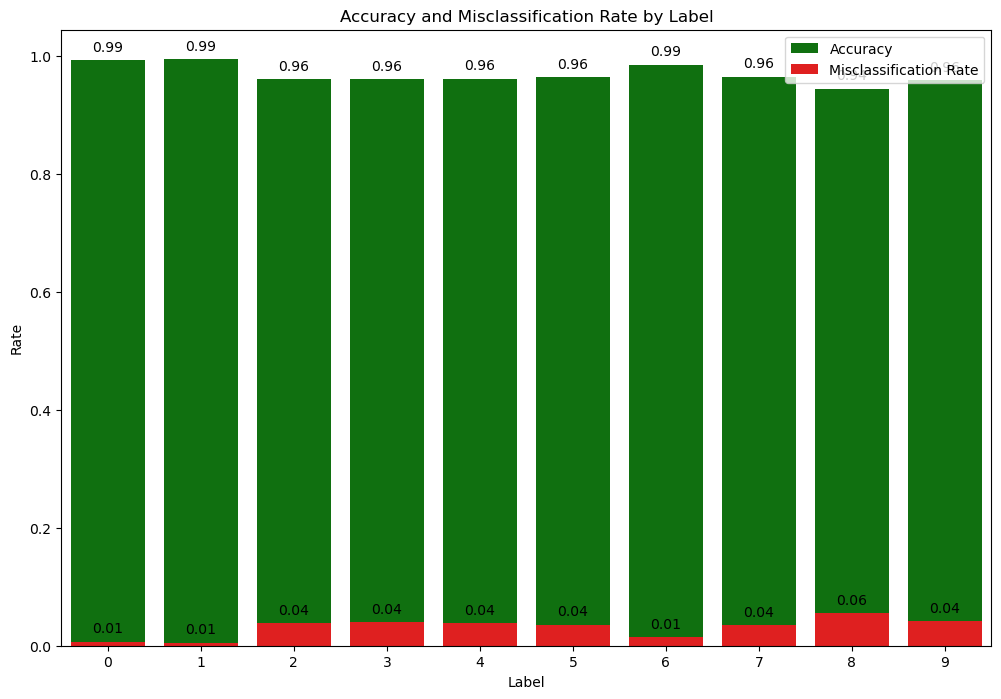

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Lấy dữ liệu mẫu bị phân loại sai
# misclassified_samples = newKNN.test_datas[newKNN.test_labels != newKNN.op_labels]

# # Tạo DataFrame với thông tin mẫu bị phân loại sai
# misclassified_data = pd.DataFrame({
#     'Actual': y_test[y_test != y_pred],
#     'Predicted': y_pred[y_test != y_pred],
#     'Index': y_test[y_test != y_pred].index
# })

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# Tính tỉ lệ đúng và sai cho từng loại nhãn
accuracy_by_label = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
misclassification_by_label = 1 - accuracy_by_label

# Tạo DataFrame từ kết quả
results_df = pd.DataFrame({
    'Label': range(10),
    'Accuracy': accuracy_by_label,
    'Misclassification Rate': misclassification_by_label
})

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))

# Biểu đồ tỉ lệ đúng
sns.barplot(x='Label', y='Accuracy', data=results_df, color='blue', label='Accuracy')
for i, value in enumerate(results_df['Accuracy']):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

# Biểu đồ tỉ lệ sai
sns.barplot(x='Label', y='Misclassification Rate', data=results_df, color='red', label='Misclassification Rate')
for i, value in enumerate(results_df['Misclassification Rate']):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.title('Accuracy and Misclassification Rate by Label')
plt.xlabel('Label')
plt.ylabel('Rate')
plt.legend()
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
for index, row in misclassified_data.sample(5).iterrows():
    actual_label = row['Actual']
    predicted_label = row['Predicted']
    sample_index = row['Index']
    
    # Lấy vector dữ liệu của mẫu bị gán nhãn sai
    sample_data = X_test.iloc[sample_index].values.reshape(28, 28)
    
    # Biểu diễn hình ảnh
    plt.imshow(sample_data, cmap='gray')
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    plt.show()

In [126]:
newKNN.CM(1)


with k = 1
----------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|

tt = 10000| PL =   0| PL =   1| PL =   2| PL =   3| PL =   4| PL =   5| PL =   6| PL =   7| PL =   8| PL =   9|

----------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|

 GT =   0 |    974  |      1  |      1  |      0  |      0  |      0  |      2  |      1  |      1  |      0  |

----------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|

 GT =   1 |      0  |    1129  |      3  |      0  |      1  |      1  |      1  |      0  |      0  |      0  |

----------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|

 GT =   2 |      7  |      3  |    999  |      4  |      1  |      0  |      2  |     13  |      3  |      0  |

----------|---------|---------|---------|---------|---------|---------|---------|---